<h6>Sratch Pad</h6>

In [167]:
# pytorch tensors
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
import os
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle

seed=4
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
pd.set_option('max_colwidth',4000)

%matplotlib inline

In [168]:
lstm = nn.LSTM(3,3,num_layers=2,bidirectional=True)
#there are 4 parameters per LSTM cell. For a 2 layer deep LSTM cell. 
print(lstm.weight_ih_l0.data.is_cuda)
print(lstm.weight_ih_l1.data.is_cuda)
print(lstm.weight_hh_l0.data.is_cuda)
print(lstm.weight_hh_l1.data.is_cuda)

print(lstm.bias_ih_l0.data.is_cuda)
print(lstm.bias_ih_l1.data.is_cuda)
print(lstm.bias_hh_l0.data.is_cuda)
print(lstm.bias_hh_l1.data.is_cuda)
def init_lstm(lstm):
    '''
    input: torch lstm
    output: weights xavier initialized, biases set to 0. 
    '''
    for name, param in lstm.named_parameters():
        print(f"processing:{name,param}")
        if 'bias' in name:
            nn.init.constant(param, 0.0)
        elif 'weight' in name:
            nn.init.xavier_normal(param)
init_lstm(lstm)
#check lstm
print("----------------------")
print(lstm.weight_hh_l1.data)
#verify just this isn't 0. 

False
False
False
False
False
False
False
False
processing:('weight_ih_l0', Parameter containing:
tensor([[ 0.0689,  0.0682, -0.4717],
        [-0.3349, -0.5690, -0.5324],
        [ 0.5691,  0.4770,  0.1369],
        [ 0.5478, -0.2091, -0.3293],
        [ 0.4922, -0.0306,  0.1096],
        [ 0.3413,  0.3042, -0.3306],
        [-0.2233, -0.5328,  0.0254],
        [-0.2070,  0.1240,  0.0269],
        [ 0.4922,  0.0497,  0.2893],
        [ 0.1822,  0.5122, -0.2400],
        [ 0.4821,  0.4141, -0.2304],
        [ 0.3539,  0.5338, -0.3264]], requires_grad=True))
processing:('weight_hh_l0', Parameter containing:
tensor([[-0.2252,  0.3950,  0.4655],
        [ 0.1523,  0.1773,  0.4276],
        [ 0.5060, -0.3651, -0.2375],
        [ 0.4861,  0.3118, -0.2709],
        [-0.1959,  0.5603, -0.3616],
        [ 0.3714,  0.3350, -0.5537],
        [-0.5763,  0.1917,  0.2833],
        [ 0.5118,  0.0712,  0.3917],
        [-0.4103,  0.3446, -0.5562],
        [ 0.3761,  0.0626,  0.3566],
        [ 0.2281

/home/dc/anaconda3/envs/cs230/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
/home/dc/anaconda3/envs/cs230/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.


In [169]:
#what happens when there are more hidden units than input? the weight parameters are different
lstm = nn.LSTM(3,10,num_layers=1,bidirectional=True)
for name, param in lstm.named_parameters():
        print(f"processing:{name,type(param),param.size()}")

processing:('weight_ih_l0', <class 'torch.nn.parameter.Parameter'>, torch.Size([40, 3]))
processing:('weight_hh_l0', <class 'torch.nn.parameter.Parameter'>, torch.Size([40, 10]))
processing:('bias_ih_l0', <class 'torch.nn.parameter.Parameter'>, torch.Size([40]))
processing:('bias_hh_l0', <class 'torch.nn.parameter.Parameter'>, torch.Size([40]))
processing:('weight_ih_l0_reverse', <class 'torch.nn.parameter.Parameter'>, torch.Size([40, 3]))
processing:('weight_hh_l0_reverse', <class 'torch.nn.parameter.Parameter'>, torch.Size([40, 10]))
processing:('bias_ih_l0_reverse', <class 'torch.nn.parameter.Parameter'>, torch.Size([40]))
processing:('bias_hh_l0_reverse', <class 'torch.nn.parameter.Parameter'>, torch.Size([40]))


$\begin{split}\begin{array}{ll}
i_t = \sigma(W_{ii} x_t + b_{ii} + W_{hi} h_{(t-1)} + b_{hi}) \\
f_t = \sigma(W_{if} x_t + b_{if} + W_{hf} h_{(t-1)} + b_{hf}) \\
g_t = \tanh(W_{ig} x_t + b_{ig} + W_{hg} h_{(t-1)} + b_{hg}) \\
o_t = \sigma(W_{io} x_t + b_{io} + W_{ho} h_{(t-1)} + b_{ho}) \\
c_t = f_t c_{(t-1)} + i_t g_t \\
h_t = o_t \tanh(c_t)
\end{array}\end{split}$

In [170]:
lstm = nn.LSTM(3,10,num_layers=3,bidirectional=True)
for name, param in lstm.named_parameters():
        print(f"processing:{name,type(param),param.size()}")

processing:('weight_ih_l0', <class 'torch.nn.parameter.Parameter'>, torch.Size([40, 3]))
processing:('weight_hh_l0', <class 'torch.nn.parameter.Parameter'>, torch.Size([40, 10]))
processing:('bias_ih_l0', <class 'torch.nn.parameter.Parameter'>, torch.Size([40]))
processing:('bias_hh_l0', <class 'torch.nn.parameter.Parameter'>, torch.Size([40]))
processing:('weight_ih_l0_reverse', <class 'torch.nn.parameter.Parameter'>, torch.Size([40, 3]))
processing:('weight_hh_l0_reverse', <class 'torch.nn.parameter.Parameter'>, torch.Size([40, 10]))
processing:('bias_ih_l0_reverse', <class 'torch.nn.parameter.Parameter'>, torch.Size([40]))
processing:('bias_hh_l0_reverse', <class 'torch.nn.parameter.Parameter'>, torch.Size([40]))
processing:('weight_ih_l1', <class 'torch.nn.parameter.Parameter'>, torch.Size([40, 20]))
processing:('weight_hh_l1', <class 'torch.nn.parameter.Parameter'>, torch.Size([40, 10]))
processing:('bias_ih_l1', <class 'torch.nn.parameter.Parameter'>, torch.Size([40]))
processing

<h6>notes to myself. df.values() cant be shuffled in place</h6>
   #foo = np.copy(df.values)
    #np.random.shuffle(df.values)
    #print(df.head()) #not shuffled
    #np.random.shuffle(foo)
    #print(foo[:4])
    #indices = np.random.permutation(foo.shape[0])
    #print(404290*.8, 404290*.2)
    #trainidx,testidx = indices[:((int)(404290*.8))],indices[((int)(404290*.8)):]
    #train,test=foo[trainidx,:],foo[testidx,:]
 

In [171]:
import os
QUORA_PATH="/home/dc/cs230_project/dataset"

def clean_quora(quora_path,orig=True,clean_ten=False,clean_most=False):
    '''
    input: path of quora tsv file downloaded from kaggle
    output: df with questions <10 chars removed
    orig: miminmal cleaning just enough to get training to pass. Remove blank lines or questions with no words.
    clean_ten: clean char less than 10 long bc you get things like What??? which clearly are junk and not duplicates
    clean_most: clean long questions which are clearly not duplicates
    '''
    df = pd.read_csv(os.path.join(QUORA_PATH,"quora_duplicate_questions.tsv"),sep="\t")
    print(df.head())
    df = df.drop(["id","qid1","qid2"],axis=1)
    print(df.count())
    #blanks in question1 or question2 columns cause training loop error
    df=df.dropna()
    print(df.count())
    df['q1_len'] = df['question1'].apply(len)
    df['q2_len'] = df['question2'].apply(len)
    print(df.head())
    df = df.loc[ (df['q1_len'] > 10) & (df['q2_len'] > 10)]
    print(df.count())
    return df



    

def load_data():
    X_train = load_single_file("X_train")
    X_valid = load_single_file("X_valid")
    X_test = load_single_file("X_test")
    y_train = load_single_file("y_train")
    y_valid = load_single_file("y_valid")
    y_test = load_single_file("y_test")
    return X_train, X_valid, X_test, y_train,y_valid, y_test
    
def make_dataset(path):
    '''
    input: path: path where quora_duplicate.tsv
    output: train, dev, valid tsv datasets
    '''
    clean_quora(QUORA_PATH)
    print(df.values.shape)#(404290, 3)
    X_train, X_test, y_train, y_test = train_test_split(df[['question1','question2']].values, df[['is_duplicate']].values, test_size=0.40, random_state=42)
    X_test,X_valid,y_test,y_valid = train_test_split(X_test, y_test, test_size=0.50, random_state=42)
    print(f"X_train.shape:{X_train.shape} X_train.shape:{y_train.shape}")
    print(f"X_test.shape:{X_test.shape} y_test.shape:{y_test.shape}")
    print(f"X_valid.shape:{X_valid.shape} y_valid.shape:{y_valid.shape}")
    
    print(X_train[:6],y_train[:6])
    print('---------------------')
    print(X_test[:6],y_test[:6])
    print('---------------------')
    print(X_valid[:6],y_valid[:6])
    
    return X_train,X_valid,X_test,y_train,y_valid,y_test
    
X_train,X_valid,X_test,y_train,y_valid,y_test = make_dataset('/home/dc/cs230_project')
save(X_train,X_valid,X_test,y_train,y_valid,y_test)

X_train_small,X_valid_small,X_test_small,y_train_small,y_valid_small,y_test_small = \
    make_dataset('/home/dc/cs230_project')
save(X_train,,X_valid,,X_test,,y_train,,y_valid,,y_test,)


X_train,X_valid,X_test,y_train,y_valid,y_test = load_data()




SyntaxError: invalid syntax (<ipython-input-171-6ab5f34593e6>, line 64)

In [172]:
#keep as template

import pandas as pd
import numpy as np
import os
QUORA_PATH="/home/dc/cs230_project/dataset"


def num_sent(text):
    '''
    this is a gross approximation because we dont tokenize and clearly ellipsis are used in the text
    and they increase the sentence count
    '''
    return text.count('.')

def num_words(text):
    return len(text.split())

def make_dataframe():
    df = pd.read_csv(os.path.join(QUORA_PATH,"quora_duplicate_questions.tsv"),sep="\t")
    #print(df.head())
    df = df.drop(["id","qid1","qid2"],axis=1)
    print(f"before dropping empty cols:{df.count()}")
    df=df.dropna()
    print(f"after dropping empty cols:{df.count()}")
    df['len_q1'] = df['question1'].apply(num_words)
    df['len_q2'] = df['question2'].apply(num_words)
    df['diff'] = df['question1'].apply(num_words) - df['question2'].apply(num_words)
    df['num_q1_sent'] = df['question1'].apply(num_sent)
    df['num_q2_sent'] = df['question2'].apply(num_sent)
    df.head()
    return df
df = make_dataframe()
df.head()

before dropping empty cols:question1       404289
question2       404288
is_duplicate    404290
dtype: int64
after dropping empty cols:question1       404287
question2       404287
is_duplicate    404287
dtype: int64


,question1,question2,is_duplicate,len_q1,len_q2,diff,num_q1_sent,num_q2_sent
0,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,14,12,2,0,0
1,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,8,13,-5,0,0
2,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,14,10,4,0,0
3,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,11,9,2,0,0
4,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,13,7,6,0,0


In [173]:
X_train,X_valid,X_test,y_train,y_valid,y_test = load_data()
print(X_train.shape,X_valid.shape,X_test.shape,y_train.shape,y_valid.shape,y_test.shape)

NameError: name 'load_data' is not defined

In [ ]:

#torch.tensor copies numpy array into CPU memory
a = torch.tensor(np.array([[1, 2, 3], [4, 5, 6]]))
print(type(a))
print(a.view(-1))
b=torch.tensor(np.array([[1,2],[3,4],[5,6]]))
print(a.size(),b.size())
print(b.view(-1)) #view flattens
#.numpy() to get back numpy 
print(type(a.numpy()),a.numpy())
#
print("current torch device",torch.cuda.current_device(),torch.cuda.is_available())
c = torch.cuda.FloatTensor(1000, 1000).fill_(0)
#images numpy is HxWxChannels, torch is channelsxHxW use transform.ToTensor
#
X1a = torch.rand((100,1))
X1b = torch.rand((100,1))
X2a = torch.rand(100,1)+.2
X2b = torch.rand(100,1)+.2

Y1 = torch.zeros([1,100],dtype=torch.int32)
Y2 = torch.ones([1,100],dtype=torch.int32)

X = torch.cat([X1a,X1b],dim=1)
Y = torch.cat([X2a,X2b],dim=1)
#print (X.size(),X.numpy())
#print (Y.size(),type(Y.numpy()))
plt.scatter(X[:,0],X[:,1],color='red')
plt.scatter(Y[:,0],Y[:,1],color='green')

plt.show()

In [ ]:
#format matrix for DL. 50 features(columns) in a row giving 25 data points and 2000 examples/rows
X1 = torch.rand(1000,50)
X2 = torch.rand(1000,50) + .2
X = torch.cat([X1,X2],dim=0)
Y1 = torch.zeros(1000,1)
Y2 = torch.ones(1000,1)
Y = torch.cat([Y1,Y2],dim=0)
print(X.size(),Y1.size(),Y2.size(),Y.size())
plt.scatter(X1[:,2],X1[:,3],color="red")
plt.scatter(X2[:,0],X2[:,1],color="blue")

plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
y_pred = model(X)

print(y_pred[0:10])
y_pred[y_pred>0.5] = 1
y_pred[y_pred<0.5] = 0
print(y_pred[0:10])
print(Y[0:10])
print(y_pred.shape)
print(Y.shape)
roc = roc_auc_score(y_pred.data.numpy() ,Y.data.numpy() )
print(roc)
from sklearn.metrics import roc_curve
print(Y.data.numpy().shape, y_pred.data.numpy().shape)

fpr, tpr, thresholds = roc_curve(Y.data.numpy(), y_pred.data.numpy())
print(fpr,tpr,thresholds)
plt.plot(fpr,tpr)
plt.show()

In [ ]:
class SimpleLogistic(nn.Module):
    def __init__(self,input_size,num_classes):
        super(SimpleLogistic,self).__init__()
        self.linear = nn.Linear(input_size,num_classes)
        
    def forward(self,x):
        return self.linear(x)

num_classes=10
learning_rate = .001
num_epochs = 5
input_size = 28*28

model = SimpleLogistic(input_size,num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
for x in range(num_epochs):
    #
    for i,(images,labels) in enumerate(train_loader):
        images = Variable(images.view(-1,28*28))
        labels = Variable(labels)
        #print(type(images),type(labels))
        #print(images.numpy())
        #print(labels.numpy())
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        if(i%100==0):
            print(f"epoch:{x} i:{i} loss:{loss}")
    

In [114]:
df.loc[df['num_q1_sent']>0] #23436 rows × 5 columns


,question1,question2,is_duplicate,len_q1,len_q2,diff,num_q1_sent,num_q2_sent
5,Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?,"I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?",1,16,16,0,3,0
33,"Does the United States government still blacklist (employment, etc.) some United States citizens because their political views?",How is the average speed of gas molecules determined?,0,17,9,8,1,0
36,I'm a 19-year-old. How can I improve my skills or what should I do to become an entrepreneur in the next few years?,I am a 19 year old guy. How can I become a billionaire in the next 10 years?,0,23,18,5,1,1
49,How do I make friends.,How to make friends ?,1,5,5,0,1,0
58,I was suddenly logged off Gmail. I can't remember my Gmail password and just realized the recovery email is no longer alive. What can I do?,I can't remember my Gmail password or my recovery email. How can I recover my e-mail?,1,26,16,10,2,1
161,"I got job offer @ Chelmsford-Essex, London with £3764 PM pay-after tax deduction. Pls advice tentative monthly expenses for couple? & saving possible?","If I am leaving Norway, can I pay down my mortgage with my BSU account, and then sell my apartment without having to pay back the tax deduction I got for having BSU?",0,23,33,-10,1,0
178,Why does some people prefer small families.?,Why do some people prefer to live with small family?,1,7,10,-3,1,0
216,I got a 3.8 GPA. Is it enough to get into top universities like Harvard?,Is a 3.8 GPA sufficient to get into a top school?,1,15,11,4,2,1
241,"There are 8 balls. 7 of them weigh the same. 1 of them has a different weight, (you don't know if it's heavier or lighter). How do you find the odd ball with 2 weighs?","How many 4 digit numbers can be formed by using 0, 1, 2, 3, 4, 5, 6, and 7? How many of them are between 4000 and 6000?",0,35,28,7,3,0
272,My ex-girlfriend is suffering from malaria. I have a deep urge of visiting her but I have my placements on. I have no idea how to be with her. What should I do?,"Should I be worried that my girlfriend texts her ex-boyfriend till 4 a.m., and if so, why?",0,33,17,16,3,2


In [159]:
df_q1 = df.loc[df['num_q1_sent']>1]
df_q2 = df.loc[df['num_q2_sent']>1]
df_q1_numdups = df_q1[df_q1['is_duplicate']==1]
df_q2_numdups = df_q2[df_q2['is_duplicate']==1]
print(df_q1_numdups.values.shape,df_q2_numdups.values.shape)
print(df_q1_numdups.count(), df_q2_numdups.count()) #1130 and 1120 are duplicates. 

(1130, 8) (1121, 8)
question1       1130
question2       1130
is_duplicate    1130
len_q1          1130
len_q2          1130
diff            1130
num_q1_sent     1130
num_q2_sent     1130
dtype: int64 question1       1121
question2       1121
is_duplicate    1121
len_q1          1121
len_q2          1121
diff            1121
num_q1_sent     1121
num_q2_sent     1121
dtype: int64


In [115]:
df.loc[df['num_q1_sent']>1] #7040 rows × 5 columns

,question1,question2,is_duplicate,len_q1,len_q2,diff,num_q1_sent,num_q2_sent
5,Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?,"I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?",1,16,16,0,3,0
58,I was suddenly logged off Gmail. I can't remember my Gmail password and just realized the recovery email is no longer alive. What can I do?,I can't remember my Gmail password or my recovery email. How can I recover my e-mail?,1,26,16,10,2,1
216,I got a 3.8 GPA. Is it enough to get into top universities like Harvard?,Is a 3.8 GPA sufficient to get into a top school?,1,15,11,4,2,1
241,"There are 8 balls. 7 of them weigh the same. 1 of them has a different weight, (you don't know if it's heavier or lighter). How do you find the odd ball with 2 weighs?","How many 4 digit numbers can be formed by using 0, 1, 2, 3, 4, 5, 6, and 7? How many of them are between 4000 and 6000?",0,35,28,7,3,0
272,My ex-girlfriend is suffering from malaria. I have a deep urge of visiting her but I have my placements on. I have no idea how to be with her. What should I do?,"Should I be worried that my girlfriend texts her ex-boyfriend till 4 a.m., and if so, why?",0,33,17,16,3,2
320,"What's the best on-line calender/scheduling/booking system? Something that allows me to show my availability & customers can 'request' to meet me. When I 'accept' their request, the appointment pops into our calendars & reminders are automated.",Is there a web service that can send appointment sms-reminders to customers extracting data from Google calendar?,0,36,17,19,2,0
398,I argued with my gf that she made friends with the person that hit on her. She said I'm a control freak and she wants her freedom. What should I do?,I'm a girl in middle school. My best friends are all girls. I've found out that I'm bisexual. How do I tell my best friend who's a girl without her freaking out and it changing our whole friendship?,0,31,38,-7,2,3
519,I am 29Y old. I have diabetic Type 2. Recently my sugar level was increased to 150 (fasting). I do exercise and eat whole grains. why this happening?,Where can I find the best Security Cameras?,0,28,8,20,4,0
528,"Who do I activate the dlc of skyrim in a laptop? Ive got it working on my computer after doing the command lines, but did the same on laptop, to no use..",I'm tired of the laptops Ive bought getting old and slow after 2ish years. Do desktops degrade as quickly? Will getting a solid state drive laptop/desktop help increase its longevity?,0,32,30,2,2,1
535,"If you have me, you want to share me. If you share me, you haven't got me. What am I?","If you have me, you want to share me. If you share me, you don't get me. What am I?",1,20,20,0,2,2


In [116]:
df.loc[df['num_q2_sent']>1] #9555 rows × 5 columns

,question1,question2,is_duplicate,len_q1,len_q2,diff,num_q1_sent,num_q2_sent
37,"When a girlfriend asks her boyfriend ""Why did you choose me? What makes you want to be with me?"", what should one reply to her?",My girlfriend said that we should end this because she is confused about her feelings for me. I wished her well and disconnected. Should I call her and ask her if she wants to get back together?,0,25,37,-12,0,2
64,Where can I find a European family office database?,Where do I find a U.S. family office database?,0,9,9,0,0,2
99,Why is the number for Skype at 1-855-425-3768 always busy?,How could I get Skype to work on an android 4.1.1 phone?,0,10,12,-2,0,2
109,How Google helps in spam ranking adjustment of the search results?,"What is the distribution of traffic between Google organic search results? e.g. #1 vs. #2 in rankings, first page vs. second page",0,11,22,-11,0,4
272,My ex-girlfriend is suffering from malaria. I have a deep urge of visiting her but I have my placements on. I have no idea how to be with her. What should I do?,"Should I be worried that my girlfriend texts her ex-boyfriend till 4 a.m., and if so, why?",0,33,17,16,3,2
371,"What is a boy/girl called when he/she is 1-6 years old, 6-11years old, 11-14 years old, and 14-18 years old?",I am an 18 years old boy and I love a girl who's 14 years old. We both live Tamil Nadu. Is this a time to propose to her?,0,20,29,-9,0,2
398,I argued with my gf that she made friends with the person that hit on her. She said I'm a control freak and she wants her freedom. What should I do?,I'm a girl in middle school. My best friends are all girls. I've found out that I'm bisexual. How do I tell my best friend who's a girl without her freaking out and it changing our whole friendship?,0,31,38,-7,2,3
449,How do I enter a new email ID which I can access to recover my Facebook ID?,I lost all my ID. I am adopted and can't access my original birth certificate. How do I replace my ID without even a birth certificate?,0,17,26,-9,0,2
479,Did Mahabharata really happen?,Did Mahabharata really happen or only an allegory according to M.K.Gandhi?,1,4,11,-7,0,2
535,"If you have me, you want to share me. If you share me, you haven't got me. What am I?","If you have me, you want to share me. If you share me, you don't get me. What am I?",1,20,20,0,2,2


In [117]:
df.loc[df['num_q1_sent']>2]  #1761 rows × 5 columns

,question1,question2,is_duplicate,len_q1,len_q2,diff,num_q1_sent,num_q2_sent
5,Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?,"I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?",1,16,16,0,3,0
241,"There are 8 balls. 7 of them weigh the same. 1 of them has a different weight, (you don't know if it's heavier or lighter). How do you find the odd ball with 2 weighs?","How many 4 digit numbers can be formed by using 0, 1, 2, 3, 4, 5, 6, and 7? How many of them are between 4000 and 6000?",0,35,28,7,3,0
272,My ex-girlfriend is suffering from malaria. I have a deep urge of visiting her but I have my placements on. I have no idea how to be with her. What should I do?,"Should I be worried that my girlfriend texts her ex-boyfriend till 4 a.m., and if so, why?",0,33,17,16,3,2
519,I am 29Y old. I have diabetic Type 2. Recently my sugar level was increased to 150 (fasting). I do exercise and eat whole grains. why this happening?,Where can I find the best Security Cameras?,0,28,8,20,4,0
979,How do I install Cydia without jailbreak on iOS 9.3.5.?,Can you download Cydia on your device without jailbreaking it?,0,10,10,0,3,0
1074,"I am 23, female. I have heavier upper body.But my legs and hip area are quite slim. What is my body shape?what exercise are some exercises for upper body?",Why am I able to do a finger pushup after training upper body and forearms?,0,29,15,14,3,0
1169,"I'm a big guy. When I get angry, people get scared and accuse me of threatening them. How do I stop this? I'm not actually a violent person.",I block people when I'm angry. I refuse to talk to them. Why do I get angry for such small things?,0,28,21,7,3,2
1460,"A couple who has 5 sons went for a picnic. Each son has 7 sisters. Each sister has 3 babies. In total, how many people went for the picnic?","Why are there so many ""no picnic"" signs in Venice?",0,29,10,19,3,0
1978,"Which is the correct grammar: ""I will appreciate if you.."" or ""I would appreciate if you..""?",How do I correct WordPress mobile grammar errors?,0,16,8,8,4,0
2062,How funny was the TV Show Joey after F.R.I.E.N.D.S.?,Have you watched Joey TV Show after watching F.R.I.E.N.D.S.?,1,9,9,0,7,7


In [118]:
df.loc[df['num_q2_sent']>2]  #2515 rows × 5 columns

,question1,question2,is_duplicate,len_q1,len_q2,diff,num_q1_sent,num_q2_sent
109,How Google helps in spam ranking adjustment of the search results?,"What is the distribution of traffic between Google organic search results? e.g. #1 vs. #2 in rankings, first page vs. second page",0,11,22,-11,0,4
398,I argued with my gf that she made friends with the person that hit on her. She said I'm a control freak and she wants her freedom. What should I do?,I'm a girl in middle school. My best friends are all girls. I've found out that I'm bisexual. How do I tell my best friend who's a girl without her freaking out and it changing our whole friendship?,0,31,38,-7,2,3
582,Why India does not have friendly relations with it's neighbouring countries?,How are India's relations with the U.S.A.?,0,11,7,4,0,3
682,What are some great side dishes for a minestrone soup?,"68.44% of product passes the process spec.To pass, the product must be close to average. How many standard deviations away does 68.44% represent?",0,10,23,-13,0,4
770,My maths have become extremely weak and I am in class 12th. How can I improve my maths so that I can clear my JEE exams next year?,"I want to do a BBA. I only got 62% in class 12 (non maths). I am taking 1 year drop for the entrance exam of Symbiosis, GGSIPU, etc. Should I also give an improvement next year?",0,28,37,-9,1,3
873,"What's the next number in the series 1,1,1,2,2,2,6,6,6?","What would be the next number in the series-2,15,4,12,6,7? ...?",0,8,10,-2,0,3
1304,How can I manage inbox in outlook for rapid response when I have a email flow of 200 emails per day?,"When it comes to mass email marketing, do you think a .com has a better chance of inboxing compared to a .net .us. info etc.?",0,21,25,-4,0,5
1311,I m bio student how I got admission in vits Vellore in biotechnology and I don't have math in 12?,Kindly tell me whole process of admission at vits Vellore for biotech.i m a bio student in 12..I don't have math there?,1,20,22,-2,0,3
1671,What are some interesting differences between American Sign Language and British Sign Language?,"Is it weird for a 'hearing' person with no deaf friends to want to learn the signed language most often used in their country (i.e. British Sign Language for me)? Is it comparative to learning a second vocal language, or would you consider it differently? I'm very interested in 'hearing' and deaf opinions.",0,13,53,-40,0,3
1833,Many women told me that they prefer guy friends over girl friends. What are the common reasons for this?,"I am a girl. My best friend (a guy) and me are emotionally attached. I do not love him, but I get jealous when he prioritizes his crush over me. What am I going through?",0,19,35,-16,1,3


In [119]:
df.loc[df['num_q1_sent']>3]  #591 rows × 5 columns

,question1,question2,is_duplicate,len_q1,len_q2,diff,num_q1_sent,num_q2_sent
519,I am 29Y old. I have diabetic Type 2. Recently my sugar level was increased to 150 (fasting). I do exercise and eat whole grains. why this happening?,Where can I find the best Security Cameras?,0,28,8,20,4,0
1978,"Which is the correct grammar: ""I will appreciate if you.."" or ""I would appreciate if you..""?",How do I correct WordPress mobile grammar errors?,0,16,8,8,4,0
2062,How funny was the TV Show Joey after F.R.I.E.N.D.S.?,Have you watched Joey TV Show after watching F.R.I.E.N.D.S.?,1,9,9,0,7,7
2286,"My husband bangs on things and breaks them during our fights. He has never hit me, though. He doesn't sort things through discussion. He also hurls abuses at me. Am I just waiting to be hit by him? Would that be his next step?","I admitted to a man I liked him, and heard later he liked me. He never told me. Why was he mad at me when he didn't make up his mind and I moved on?",0,44,35,9,4,2
3961,"I've been learning piano since I was 12 years old. I'm 18 now and I still suck at piano. I did stop piano for 1-2 years in between, but I still suck at playing it. I have my grade 4 certificate. How am I supposed to play like a pro pianist?","I've played piano for 11 years and violin for 5 years. If I spend 1 hour a day learning cello, how much can I learn in 2 months?",0,51,28,23,4,1
4607,"I work on volume reconstruction in electron microscopy. I want to convert from PDB (.ent) file to a VOL file (.vol). But to read the vol file in MATLAB, I need some information about the vol file (like size, offset, etc.). How can I get that information about the VOL file?",How do I use the DLL file converted from a MATLAB file in PHP?,0,51,14,37,6,0
5023,How many Vietnamese IQ points have been reduced by the U.S.’ 10 years chemical bombing during the U.S.-Vietnam war?,How many millions of lives did the U.S save by ending the war early with a nuclear bomb blast in Japan?,0,19,21,-2,4,1
6288,How can I get MOOC related to Bachelor of Homoeopathic Medicine & Surgery [B.H.M.S.] developed by Indian doctors/Medical professorial/professors?,How can I get MOOC related to Bachelor of Ayurvedic Medicine and Surgery (B.A.M.S.) developed by Indian doctors/Medical professorial/professors?,0,19,19,0,4,4
6353,Http://www.fitclown.com/lose-wat... #lose #weight #water?,"What is a good solar panel installation provider in Jamul, California CA?",0,4,12,-8,5,0
8201,Z=(1^2) - (2^2) + (3^2) - (4^2) +...- (2998^2) + (2999^2). What is the value of Z?,What is the value of (1+2^1/2) ^2?,0,17,7,10,4,0


In [120]:
df.loc[df['num_q2_sent']>3]  #900 rows × 5 columns

,question1,question2,is_duplicate,len_q1,len_q2,diff,num_q1_sent,num_q2_sent
109,How Google helps in spam ranking adjustment of the search results?,"What is the distribution of traffic between Google organic search results? e.g. #1 vs. #2 in rankings, first page vs. second page",0,11,22,-11,0,4
682,What are some great side dishes for a minestrone soup?,"68.44% of product passes the process spec.To pass, the product must be close to average. How many standard deviations away does 68.44% represent?",0,10,23,-13,0,4
1304,How can I manage inbox in outlook for rapid response when I have a email flow of 200 emails per day?,"When it comes to mass email marketing, do you think a .com has a better chance of inboxing compared to a .net .us. info etc.?",0,21,25,-4,0,5
2062,How funny was the TV Show Joey after F.R.I.E.N.D.S.?,Have you watched Joey TV Show after watching F.R.I.E.N.D.S.?,1,9,9,0,7,7
2336,At what age do puppies stop biting?,My 2 months old female golden retriever puppy bites a lot. It doesn't look like play biting. She bites very furiously. Even when we are walking through her she follows us and tries to bite us very hard. What do I have to do to stop my puppy from biting?,0,7,50,-43,0,4
2509,"How is it decided before birth whether a newborn baby will be Muslim, Christian, Buddhist or Jewish?",Why is the term blog often used as a prefix in a URL? For example: blog.domain.com instead of domain.com/blog.?,0,17,19,-2,0,4
2702,My girlfriend said that we should end this because she is confused about her feelings for me. I wished her well and disconnected. Should I call her and ask her if she wants to get back together?,"After 2 years being in a relationship my girlfriend says she doesnt want to get physical with me. She says she doesn't like it now. I always think something is wrong and we end up fighting, but she says she loves me. I am confused. What should I do and believe?",0,37,51,-14,2,4
2712,What is [math]\sqrt {2+\sqrt {2+\sqrt {2+\sqrt {2+...\infty}}}}[/math] ?,If [math]y=f(x)=\sqrt{x+\sqrt{x^2+\sqrt{x+\sqrt{x^2+\sqrt{...\infty}}}}}[/math] and [math]\int f'(x)dy=g(y)+c[/math]. Then what is [math]g[/math]?,0,8,9,-1,3,4
3106,"Which is the best sitcom: the Big Bang Theory, HIMYM or Friends?",Which other sitcoms you should watch if you loved The Big Bang Theory and F.R.I.E.N.D.S.?,0,12,15,-3,0,7
4195,"If I skip a back paper in B.Tech, will I face any problem during certificate verification by PSU or IIT?","I am a B.Tech (ECE) 2012 pass out. I was selected for a central government job in the department of India, but now I want to change my job profile. I want to start working in the technical field, but I am facing so many problems. How do I change my job?",0,20,52,-32,1,4


In [126]:
#remove first row since that has a diff of -1080!!!
#not replicated? 
#the -223 is not the header
import numpy as np

test = df['diff'].values
print(type(test),test.shape)
print(np.min(test),np.max(test)) 

#df = df.drop([0])
test1 = df['diff'].values
print(type(test1),test1.shape)

print(test1[0:10])
print(np.min(test1),np.max(test1)) 
#-1080 487 gee that is stunning!!
#print(df[0].values) this doesnt print, error. header is not part of the table anymore? 
#tehre is a header at row 0
#forget this code. 

<class 'numpy.ndarray'> (404287,)
-223 98
<class 'numpy.ndarray'> (404287,)
[ 2 -5  4  2  6  0 -7 -2  0  0]
-223 98


KeyError: 0

In [137]:
df.loc[df['is_duplicate'] ==1]#149263 rows × 9 columns


,question1,question2,is_duplicate,len_q1,len_q2,diff,num_q1_sent,num_q2_sent
5,Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?,"I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?",1,16,16,0,3,0
7,How can I be a good geologist?,What should I do to be a great geologist?,1,7,9,-2,0,0
11,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1,9,8,1,0,0
12,What can make Physics easy to learn?,How can you make physics easy to learn?,1,7,8,-1,0,0
13,What was your first sexual experience like?,What was your first sexual experience?,1,7,6,1,0,0
15,What would a Trump presidency mean for current international master’s students on an F1 visa?,How will a Trump presidency affect the students presently in US or planning to study in US?,1,15,17,-2,0,0
16,What does manipulation mean?,What does manipulation means?,1,4,4,0,0,0
18,Why are so many Quora users posting questions that are readily answered on Google?,Why do people ask Quora questions which can be answered easily by Google?,1,14,13,1,0,0
20,Why do rockets look white?,Why are rockets and boosters painted white?,1,5,7,-2,0,0
29,How should I prepare for CA final law?,How one should know that he/she completely prepare for CA final exam?,1,8,12,-4,0,0


In [138]:
hist = df_dup['diff'].values
print( np.min(df_dup['diff'].values),np.max(df_dup['diff'].values))


-33 39


In [139]:
df.loc[ ( df['diff'] < -300)] 

,question1,question2,is_duplicate,len_q1,len_q2,diff,num_q1_sent,num_q2_sent


In [140]:
df.loc[ ( df['diff'] < -10)] #header problem is still here. 

,question1,question2,is_duplicate,len_q1,len_q2,diff,num_q1_sent,num_q2_sent
37,"When a girlfriend asks her boyfriend ""Why did you choose me? What makes you want to be with me?"", what should one reply to her?",My girlfriend said that we should end this because she is confused about her feelings for me. I wished her well and disconnected. Should I call her and ask her if she wants to get back together?,0,25,37,-12,0,2
56,Who is israil friend?,Is my boyfriend lying about his true feelings for his friend and is he secretly attracted to her?,0,4,18,-14,0,0
91,"National Institute of Technology, Kurukshetra: How is the social life at NITK, Surathkal?","National Institute of Technology Karnataka (NITK) , Surathkal: To the graduating batch: What lessons would you want to give to your juniors before you leave?",0,13,25,-12,0,0
109,How Google helps in spam ranking adjustment of the search results?,"What is the distribution of traffic between Google organic search results? e.g. #1 vs. #2 in rankings, first page vs. second page",0,11,22,-11,0,4
138,How i get hair on bald head?,"If I shave my head for 2 years as am getting bald and then grew my hair, will the hair will be same as when I intially have? Or I loose more hair?",0,7,33,-26,0,0
140,What is our stance against Pakistan?,What is the stance of Pakistan in the possession of weapons of mass destruction by North korea? Does it support DPRK or is it against DPRK?,0,6,26,-20,0,0
170,What is the difference between gross salary and CTC?,"There seems to be a difference between my weekly paycheck and the yearly salary my employer agreed upon, how does that work?",0,9,22,-13,0,0
201,Are there People who are willing to give free lectures or conduct free workshop in India colleges?,"Almost two weeks in on Prozac, why do I still feel antisocial and still don't want to go to events? Why does my social behavior and mood change daily?",0,17,29,-12,0,0
202,What's the best way to start learning robotics?,What is the best way to start robotics? Which is the best development board that I can start working on it?,0,8,21,-13,0,0
204,Why are women who are on their periods are regarded as 'unclean' such that they are prevented in taking an actived part in rituals (Hinduism)?,"Why is it always expected that a woman should take care of housework, children and cooking (especially in Indian culture)? Are these activities the responsibility of women alone? Why do men not share equally in such work?",0,25,37,-12,0,0


In [141]:
df.loc[ ( df['diff'] > 10)]#13529 rows × 8 columns

,question1,question2,is_duplicate,len_q1,len_q2,diff,num_q1_sent,num_q2_sent
47,"What are the stages of breaking up between couple? I mean, what happens after the breaking up emotionally whether its a male or female?","Who is affected more by a breakup, the boy or the girl?",0,24,12,12,0,0
80,When will the BJP government strip all the Muslims and the Christians of the Indian citizenship and put them on boats like the Rohingya's of Burma?,"Why India does not apply the ""Burma-Rohingya model"" to deport illegal Bangladeshis?",0,26,12,14,0,0
187,"What would happen if you cover one of your eyes with an eye patch for one year, then take the patch off?",What happens if eye medicine enters the eye?,0,22,8,14,0,0
211,How headphones work as an Antenna to play FM radio channels on Mobile phones? Why mobile companies doesn't install the same inbuilt Antenna on phones to be able to play FM without the headphones?,Why don't phones have a built-in FM antenna?,0,34,8,26,0,0
248,"What is the best way to invest $500 legally so that I can get tangible profits over a relatively short period of time, say 6 months?",How can I best invest ₹5000 over the next 6 months?,0,26,11,15,0,0
272,My ex-girlfriend is suffering from malaria. I have a deep urge of visiting her but I have my placements on. I have no idea how to be with her. What should I do?,"Should I be worried that my girlfriend texts her ex-boyfriend till 4 a.m., and if so, why?",0,33,17,16,3,2
283,When travelling to a new region is it better to immerse yourself in 1–2 cities or to see as many cities as you can cram in?,What are the ways to explore world without spending more money?,0,26,11,15,0,0
320,"What's the best on-line calender/scheduling/booking system? Something that allows me to show my availability & customers can 'request' to meet me. When I 'accept' their request, the appointment pops into our calendars & reminders are automated.",Is there a web service that can send appointment sms-reminders to customers extracting data from Google calendar?,0,36,17,19,2,0
338,I wish to simulate a fake location for an app running on my iOS device. How do you fake a GPS location for iOS without jailbreaking as a non-coder?,How can I fake my iPhone location without jailbreaking?,0,29,9,20,1,0
413,"Is it true that in order to be part of an elite or just rich and successful, you have to join a secret organisation otherwise no chance at all?",What is the syllabus for ICSE 2017 geography map?,0,29,9,20,0,0


In [145]:
df.loc[ ( df['diff'] > -10) & ( df['diff'] < 10)] #366194 rows × 8 columns

,question1,question2,is_duplicate,len_q1,len_q2,diff,num_q1_sent,num_q2_sent
0,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,14,12,2,0,0
1,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,8,13,-5,0,0
2,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,14,10,4,0,0
3,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,11,9,2,0,0
4,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,13,7,6,0,0
5,Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?,"I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?",1,16,16,0,3,0
6,Should I buy tiago?,What keeps childern active and far from phone and video games?,0,4,11,-7,0,0
7,How can I be a good geologist?,What should I do to be a great geologist?,1,7,9,-2,0,0
8,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,8,8,0,0,0
9,Motorola (company): Can I hack my Charter Motorolla DCX3400?,How do I hack Motorola DCX3400 for free internet?,0,9,9,0,0,0


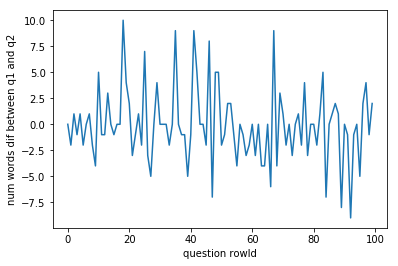

In [161]:
import matplotlib.pyplot as plt
%matplotlib inline

x = pd.Series(list(range(len(hist))))
y = hist
plt.plot(x[0:100],y[0:100])
plt.xlabel("question rowId")
plt.ylabel("num words dif between q1 and q2")
plt.show()

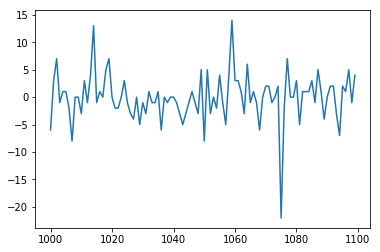

In [131]:
plt.plot(x[1000:1100],y[1000:1100])
plt.show()

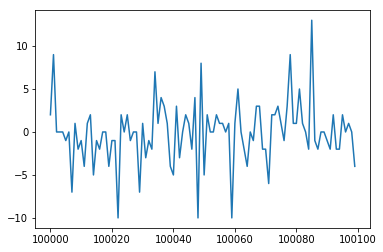

In [132]:
plt.plot(x[100000:100100],y[100000:100100])
plt.show()

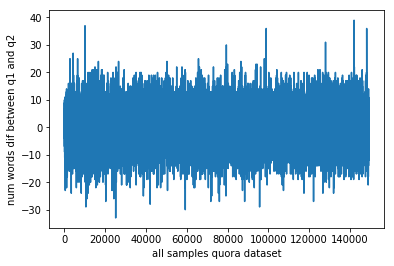

In [162]:
plt.plot(x,y)
plt.xlabel('all samples quora dataset')
plt.ylabel('num words dif between q1 and q2')
plt.show()

In [135]:
df.loc[ ( df['diff'] > 20)  ] #1795 rows × 8 columns

,question1,question2,is_duplicate,len_q1,len_q2,diff,num_q1_sent,num_q2_sent
211,How headphones work as an Antenna to play FM radio channels on Mobile phones? Why mobile companies doesn't install the same inbuilt Antenna on phones to be able to play FM without the headphones?,Why don't phones have a built-in FM antenna?,0,34,8,26,0,0
765,Whenever its about “her” its a very special feeling. Tried hard to forget her but she's alwys spcl. Should I stop talking to her even as a friend ?,How should I stop thinking about someone?,0,29,7,22,2,0
775,Why I feel dizzy when I am playing some 3D games but others do not make me feel like this? Are there any tricks in developing 3D games to avoid this?,3D Rad: How can I make a mission-based game?,0,31,9,22,0,0
1548,"I sent a gift to a potential mentor and followed up 4 days later. Still no response, should I show up to to his next event? What would you do? Ty :)",Why is the analog computer faster than digital?,0,32,8,24,1,0
1614,"How often should I massage my face with Argan oil? Apparently, Argan oil is extremely beneficial for acne scars, healthy/radiant skins and etc. How often should I massage it onto my face before going to bed? Could I maybe use Argan oil one night and then the Liz Earle repair moisturiser the next to achieve a healthy, young and radiant skin? Plz help with answering :).",Which one should I use: olive oil or coconut oil for acne?,0,66,12,54,2,0
1654,"What is the meaning of automatic route, FIPB route, etc. of FDI? What are the pro and cons of each entry gate within the Indian economy? What is the rationale behind choosing one over the other?",What are the diffences between FDI and FII?,0,36,8,28,1,0
1837,"When did you start to learn coding? Is it true that if someone wants to be extremely good at coding, he or she will have to start learning at a young age?",What are the best ways to learn C#?,0,32,8,24,0,0
1962,"I have a job in Timor Leste Australian base company and I can get a PR after my 8 month job. My question, is it possible to go Australia with PR?",How much possibility of getting Australian PR after positive assessment?,0,31,10,21,1,0
2023,"If I install a 2 kW ac in a house with 1kw rating electricity meter, will it burn the meter or lead to a short circuit?",Are electric meters tamperable?,0,26,4,22,0,0
2130,My GF still talks and hangs out with her ex while I am at work. Told her I don't like it but she says they are just friends. Should I be worried?,What kind of camouflage pattern this?,0,32,6,26,2,0


In [136]:
df.loc[ ( df['diff'] > 10)  ] #13529 rows × 8 columns

,question1,question2,is_duplicate,len_q1,len_q2,diff,num_q1_sent,num_q2_sent
47,"What are the stages of breaking up between couple? I mean, what happens after the breaking up emotionally whether its a male or female?","Who is affected more by a breakup, the boy or the girl?",0,24,12,12,0,0
80,When will the BJP government strip all the Muslims and the Christians of the Indian citizenship and put them on boats like the Rohingya's of Burma?,"Why India does not apply the ""Burma-Rohingya model"" to deport illegal Bangladeshis?",0,26,12,14,0,0
187,"What would happen if you cover one of your eyes with an eye patch for one year, then take the patch off?",What happens if eye medicine enters the eye?,0,22,8,14,0,0
211,How headphones work as an Antenna to play FM radio channels on Mobile phones? Why mobile companies doesn't install the same inbuilt Antenna on phones to be able to play FM without the headphones?,Why don't phones have a built-in FM antenna?,0,34,8,26,0,0
248,"What is the best way to invest $500 legally so that I can get tangible profits over a relatively short period of time, say 6 months?",How can I best invest ₹5000 over the next 6 months?,0,26,11,15,0,0
272,My ex-girlfriend is suffering from malaria. I have a deep urge of visiting her but I have my placements on. I have no idea how to be with her. What should I do?,"Should I be worried that my girlfriend texts her ex-boyfriend till 4 a.m., and if so, why?",0,33,17,16,3,2
283,When travelling to a new region is it better to immerse yourself in 1–2 cities or to see as many cities as you can cram in?,What are the ways to explore world without spending more money?,0,26,11,15,0,0
320,"What's the best on-line calender/scheduling/booking system? Something that allows me to show my availability & customers can 'request' to meet me. When I 'accept' their request, the appointment pops into our calendars & reminders are automated.",Is there a web service that can send appointment sms-reminders to customers extracting data from Google calendar?,0,36,17,19,2,0
338,I wish to simulate a fake location for an app running on my iOS device. How do you fake a GPS location for iOS without jailbreaking as a non-coder?,How can I fake my iPhone location without jailbreaking?,0,29,9,20,1,0
413,"Is it true that in order to be part of an elite or just rich and successful, you have to join a secret organisation otherwise no chance at all?",What is the syllabus for ICSE 2017 geography map?,0,29,9,20,0,0


5     0
7    -2
11    1
12   -1
13    1
Name: diff, dtype: int64
-33
39
0.0


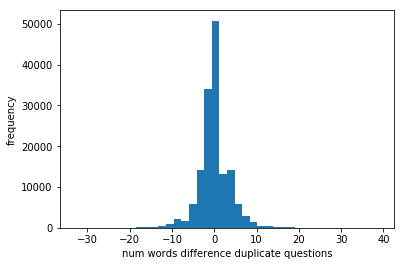

In [163]:
df.loc[df['is_duplicate']==1] #149263 rows × 9 columns
df_dup = df.loc[df['is_duplicate']==1]
test = df_dup['diff']
print(test.head())
test.values.shape
print(np.min(test.values))
print(np.max(test.values))
print(np.median(test.values))
#range for duplicates 
plt.hist(x=test.values,bins=40)
plt.xlabel("num words difference duplicate questions")
plt.ylabel("frequency")
plt.show()

1 125 1 237 10.942256367382576 11.182016735635823


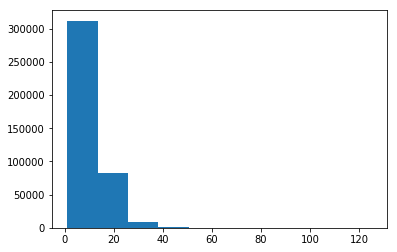

In [164]:
q1_len = df['len_q1'].values
q2_len = df['len_q2'].values
print(np.min(q1_len),np.max(q1_len), np.min(q2_len),np.max(q2_len),np.mean(q1_len),np.mean(q2_len))
plt.hist(q1_len)
plt.show()

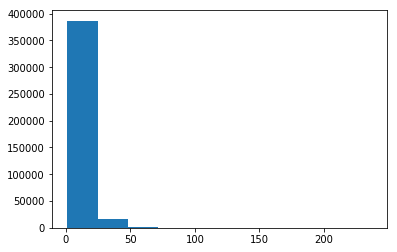

In [151]:
plt.hist(q2_len)
plt.show() #this means throw out everything <120 len

Counter({0: 380851, 1: 16396, 2: 5279, 3: 1170, 4: 400, 5: 95, 6: 61, 7: 15, 8: 8, 9: 6, 13: 2, 10: 2, 11: 1, 12: 1})


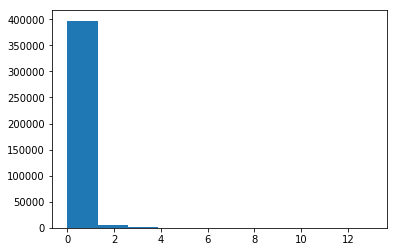

In [152]:
import collections
from collections import Counter

q1 = df['num_q1_sent'].values
print(collections.Counter(q1))

q2 = df['num_q2_sent'].values
plt.hist(q1)
plt.show()

<table>
<tr><th>num sentences question 1:frequency</th></tr>
<tr><td>0:380851</td><td>1:16396</td><td>2: 5279</td></tr>
<tr><td>3: 1170</td><td>4:400</td><td>5:95</td></tr>
<tr><td>6:61</td><td>7:15</td><td>8:9</td></tr>
<tr><td>13:2</td><td>10:2</td><td>11:1</td></tr>


</table>

Counter({0: 376717, 1: 18015, 2: 7040, 3: 1615, 4: 556, 5: 162, 6: 92, 7: 36, 9: 21, 8: 17, 10: 5, 23: 3, 11: 3, 13: 2, 12: 1, 18: 1, 21: 1})


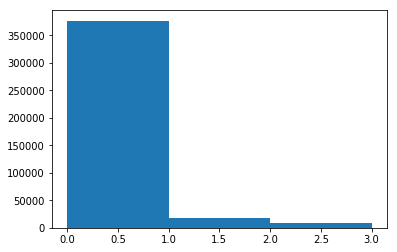

In [153]:
import collections
from collections import Counter

print(collections.Counter(q2))
plt.hist(q2,bins=3,range=(0,3))
plt.show()

<table>
<tr><th>num</th><th> sentences</th><th> question 2</th><th>: frequency</th></tr>
<tr><td>0:376717</td><td>1:18015</td><td>2:7040</td><td>3:1615</td><td>4:556</td><td>5:162</td></tr>
<tr><td>6:92</td><td>7:36</td><td>9:21</td><td>8:17</td><td>10:5</td><td>23:3</td></tr>
<tr><td>11:3</td><td>13:2</td><td>12:1</td><td>18:1</td><td>21:</td></tr>
                        

</table>

In [154]:
#lets get some stats on 0 sentences which are dominant for number of wrods. 
#num_q1 sent and num_q1 words
df_zero_q1 = df.loc[df['num_q1_sent']==0]
print(np.min(df_zero_q1['len_q1'].values),np.max(df_zero_q1['len_q1'].values),np.mean(df_zero_q1['len_q1'].values))
df_zero_q2 = df.loc[df['num_q2_sent']==0]
print(np.min(df_zero_q2['len_q2'].values),np.max(df_zero_q2['len_q2'].values),np.mean(df_zero_q2['len_q2'].values))
import collections
from collections import Counter

print(collections.Counter(df_zero_q1['len_q1']))
print(collections.Counter(df_zero_q2['len_q2']))

1 58 10.462435440631639
1 84 10.467170316178988
Counter({8: 46865, 9: 44691, 7: 42500, 10: 38569, 6: 30424, 11: 29137, 12: 23401, 5: 18460, 13: 17957, 14: 15497, 15: 12420, 16: 9947, 4: 9404, 17: 7440, 18: 5838, 19: 4864, 20: 4138, 21: 3460, 22: 2890, 3: 2825, 23: 2057, 24: 1747, 25: 1421, 26: 1253, 27: 905, 28: 746, 29: 479, 30: 347, 31: 254, 32: 185, 33: 140, 34: 86, 35: 83, 2: 65, 1: 62, 36: 61, 37: 40, 39: 32, 38: 30, 42: 24, 40: 22, 43: 18, 45: 14, 41: 13, 44: 11, 51: 5, 49: 5, 47: 4, 48: 4, 46: 3, 50: 3, 53: 2, 58: 1, 54: 1, 55: 1})
Counter({8: 47837, 9: 43457, 7: 42712, 10: 38566, 6: 31262, 11: 27444, 12: 21652, 5: 18931, 13: 16782, 14: 14444, 15: 12027, 4: 9970, 16: 9713, 17: 6491, 18: 5654, 19: 4816, 20: 3963, 21: 3234, 3: 2940, 22: 2576, 23: 2152, 24: 1930, 25: 1666, 26: 1606, 27: 1261, 28: 927, 29: 533, 30: 393, 31: 308, 33: 207, 32: 195, 34: 150, 35: 131, 36: 126, 39: 109, 37: 106, 38: 102, 40: 63, 2: 43, 43: 23, 41: 22, 45: 21, 1: 21, 49: 19, 42: 19, 46: 14, 48: 13, 44: 13

In [38]:
pd.set_option('max_colwidth',4000)
print(df.loc[df['id']==86145])



          id    qid1    qid2  \
86145  86145  145320  145321   

                                                                                                                                                                                                                                                                                                                   question1  \
86145  You have 100 coins laying flat on a table, each with a head side and a tail side. 10 of them are heads up, 90 are tails up. You can't feel, see or in any other way find out which side is up. Split the coins into two piles such that there are the same number of heads facing up in each pile. How did you do it?   

                                                                                         question2  \
86145  If two coins are tossed 5 times, what is the chance that there will be 5 heads and 5 tails?   

       is_duplicate  q1_len  q2_len  diff  
86145             0     309      91   218  


In [ ]:
!aws ec2 describe-regions

In [ ]:
!aws comprehend detect-dominant-language --text "Wabunge wapitisha muswada wa ukomo wa rais Uganda kusomwa kwa mara ya pili"


In [ ]:
text_list= ["What is the step by step guide to invest in shares in the stock market?"]
!aws comprehend batch-detect-sentiment --text-list text_list --language-code "en"




In [ ]:
import re
from subprocess import call
foo = !aws comprehend batch-detect-sentiment --text-list text_list --language-code "en"
#print(foo)
#foo.field()
#for x in foo.fields():
#    print(x)

def clean_sentiment(clean_this,keyword):
    #print(f"clean_this:{clean_this} keyword:{keyword}")
    clean_Me = re.sub(r'[ :\"\]\[,]+','',clean_this.replace(keyword,''))
    #print(f"clean_Me:{clean_Me}")
    return clean_Me

#clean_sentiment(foo)
print('-------------')
#print(foo.grep('"Sentiment":'))
check = clean_sentiment(foo.grep('"Sentiment":')[0],"Sentiment")
print(f"Sentiment:{check}")

#print(foo.grep('"Mixed":'))
check1 = clean_sentiment(foo.grep('"Mixed":')[0],"Mixed")
print(f"Mixed:{check1}")
#print(foo.grep('"Positive":'))
check2 = clean_sentiment(foo.grep('"Positive":')[0],"Positive")
print(f"Positive:{check2}")

#print(foo.grep('"Neutral":'))
check3 = clean_sentiment(foo.grep('"Neutral":')[0],"Neutral")
print(f"Neutral:{check3}")

#print(foo.grep('"Negative":'))
check4 = clean_sentiment(foo.grep('"Negative":')[0],"Negative")
print(f"Negative:{check4}")


def get_sentiment():
    for idx in range(1000):
        text_list = []
        if(idx%10==0):
            print(idx)
        #print(df['question1'].values[idx])
        text_list.append(df['question1'].values[idx])
        foo1 = !aws comprehend batch-detect-sentiment --text-list text_list --language-code "en"
        check = clean_sentiment(foo.grep('"Sentiment":')[0],"Sentiment")
        #print(f"Sentiment:{check}")
        if not check=="NEUTRAL":
            print(check,text_list)
        #print(foo.grep('"Mixed":'))
        check1 = clean_sentiment(foo.grep('"Mixed":')[0],"Mixed")
        #print(f"Mixed:{check1}")
        #print(foo.grep('"Positive":'))
        check2 = clean_sentiment(foo.grep('"Positive":')[0],"Positive")
        #print(f"Positive:{check2}")
        
        #print(foo.grep('"Neutral":'))
        check3 = clean_sentiment(foo.grep('"Neutral":')[0],"Neutral")
        #print(f"Neutral:{check3}")
        
        #print(foo.grep('"Negative":'))
        check4 = clean_sentiment(foo.grep('"Negative":')[0],"Negative")
        #print(f"Negative:{check4}")
        
    print("done sentiment")
    
get_sentiment()

In [ ]:
!aws comprehend detect-entities \
    --region "us-east-1" \
    --language-code "en" \
    --text "It is raining today in Seattle."





In [ ]:
import re

foo = !aws comprehend detect-key-phrases \
    --region 'us-east-1' \
    --language-code "en" \
    --text "It is raining today in Seattle."
print(foo)
#print(foo.fields())

def clean_keyphrases(foo):
    '''
    input: output of aws cli comprenend
    output: list of text, scores
    '''
    text = foo.grep("Text"  )
    score = foo.grep("Score")
    #print(f"text:{text}")
    #print(f"score:{score}")
    return_list = []
    for t,s in zip(text,score):
        #print(f"t:{t},s:{s}")
        t_processed = re.sub(r'[:, \"]+','',t.strip().replace('Text',''))
        s_processed = re.sub(r'[:, \"]+','',s.strip().replace('Score',''))
        #print(f"t:{t_processed} x:{s_processed}")
        return_list.append((t_processed,s_processed))
    return return_list

test_me = clean_keyphrases(foo)
print(test_me)